Part 1. Install and Import Libraries

In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import math
import time

from google.colab import files
from scipy import stats
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



S&P500

In [3]:
url = 'https://raw.githubusercontent.com/datasets/s-and-p-500-companies/master/data/constituents.csv'
import pandas as pd
sp500_df = pd.io.parsers.read_csv(url)
sp500_list = sp500_df['Symbol'].to_list()
print(len(sp500_list))

503


In [4]:
stockReturnDict = {}
stockReturnDF = pd.DataFrame()
meta_data = {}

dataStartDate = '2012-01-01'
dataEndDate = '2022-10-28'

for i, ticker in enumerate(sp500_list):
  #if i >=50 and i < 100:
  if i<3:

    print(ticker)
    time.sleep(3)
    try:

      formationPeriodData = yf.download([ticker], start=dataStartDate, end=dataEndDate)
      stockReturnDict[ticker]={}
      stockReturnDict[ticker]['ticker'] = ticker
      stockReturnDict[ticker]['Adj Close'] = formationPeriodData['Adj Close']
      stockReturnDict[ticker]['ret']  =  (stockReturnDict[ticker]['Adj Close']-stockReturnDict[ticker]['Adj Close'].shift(1))/stockReturnDict[ticker]['Adj Close'].shift(1)
      stockReturnDict[ticker]['lnReturns']  = np.log(stockReturnDict[ticker]['Adj Close']/stockReturnDict[ticker]['Adj Close'].shift(1))
      stockReturnDict[ticker]['cumLnReturns'] = stockReturnDict[ticker]['lnReturns'].cumsum()
      stockReturnDF = pd.concat([stockReturnDF, pd.DataFrame(stockReturnDict[ticker])], axis=0)

    except:
      pass


MMM
[*********************100%%**********************]  1 of 1 completed
AOS
[*********************100%%**********************]  1 of 1 completed
ABT
[*********************100%%**********************]  1 of 1 completed


In [5]:
#print(stockReturnDict['AOS'].keys())
stockReturnDict['AOS']['Adj Close'].index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2022-10-14', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21', '2022-10-24', '2022-10-25',
               '2022-10-26', '2022-10-27'],
              dtype='datetime64[ns]', name='Date', length=2724, freq=None)

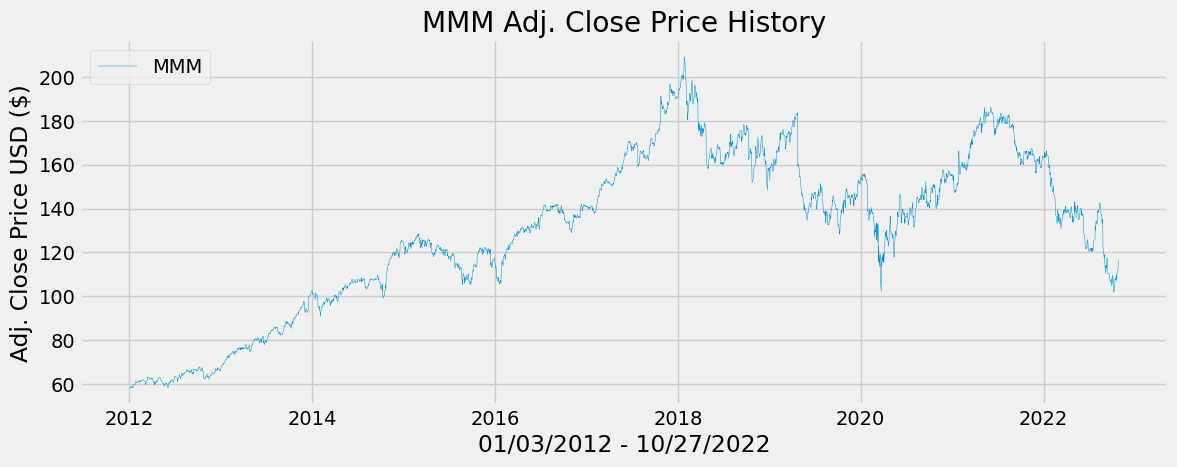

In [6]:
ticker = 'AOS'
ticker = 'MMM'
start = min(stockReturnDict[ticker]['Adj Close'].index)
end = max(stockReturnDict[ticker]['Adj Close'].index)

plt.figure(figsize=(12.5, 4.5))
plt.plot(stockReturnDict[ticker]['Adj Close'], label = ticker, linewidth = 0.35)
plt.title(ticker+' Adj. Close Price History')
plt.xlabel(start.strftime("%m/%d/%Y")+" - "+end.strftime("%m/%d/%Y"))
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [7]:
stockReturnDF

,ticker,Adj Close,ret,lnReturns,cumLnReturns
Date,,,,,
2012-01-03,MMM,58.238373,NaN,NaN,NaN
2012-01-04,MMM,58.719658,0.008264,0.008230,0.008230
2012-01-05,MMM,58.454601,-0.004514,-0.004524,0.003706
2012-01-06,MMM,58.154640,-0.005132,-0.005145,-0.001439
2012-01-09,MMM,58.503426,0.005998,0.005980,0.004541
...,...,...,...,...,...
2022-10-21,ABT,93.711525,-0.001576,-0.001577,1.472301
2022-10-24,ABT,96.895714,0.033979,0.033414,1.505715
2022-10-25,ABT,96.560539,-0.003459,-0.003465,1.502250


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(stockReturnDF, *['Adj Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(stockReturnDF, *['ret'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(stockReturnDF, *['lnReturns'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(stockReturnDF, *['cumLnReturns'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(stockReturnDF, *['Adj Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(stockReturnDF, *['ret'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(stockReturnDF, *['lnReturns'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(stockReturnDF, *['cumLnReturns'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(stockReturnDF, *['ticker'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(stockReturnDF, *[[['Adj Close', 'ret'], ['ret', 'lnReturns'], ['lnReturns', 'cumLnReturns']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(stockReturnDF, *['Adj Close', 'ticker'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(stockReturnDF, *['ret', 'ticker'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(stockReturnDF, *['lnReturns', 'ticker'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(stockReturnDF, *['cumLnReturns', 'ticker'], **{'inner': 'box'})
chart

In [ ]:
stockReturnDF = stockReturnDF.sort_values(['ticker','Date'])

stockReturnDF['ret']  =  (stockReturnDF['Adj Close']-stockReturnDF['Adj Close'].shift(1))/stockReturnDF['Adj Close'].shift(1)
stockReturnDF['lnReturns']  = np.log(stockReturnDF['Adj Close']/stockReturnDF['Adj Close'].shift(1))

stockReturnDF.loc[stockReturnDF['ticker'] != stockReturnDF['ticker'].shift(1), 'lnReturns'] = np.NaN
stockReturnDF.loc[stockReturnDF['ticker'] != stockReturnDF['ticker'].shift(1), 'ret'] = np.NaN

stockReturnDF['Date'] = stockReturnDF.index

stockReturnDF['YearMonth'] = stockReturnDF['Date'].map(lambda x: str(x)[:4] + str(x)[5:7])


In [ ]:
stockReturnDF.to_csv('tmp01.csv')

In [ ]:
stockReturnDF.head(5000)

,ticker,Adj Close,ret,lnReturns,cumLnReturns,Date,YearMonth
Date,,,,,,,
2012-01-03,ABT,21.806480,NaN,NaN,NaN,2012-01-03,201201
2012-01-04,ABT,21.721897,-0.003879,-0.003886,-0.003886,2012-01-04,201201
2012-01-05,ABT,21.671911,-0.002301,-0.002304,-0.006190,2012-01-05,201201
2012-01-06,ABT,21.475840,-0.009047,-0.009088,-0.015279,2012-01-06,201201
2012-01-09,ABT,21.471996,-0.000179,-0.000179,-0.015458,2012-01-09,201201
...,...,...,...,...,...,...,...
2021-01-12,AOS,56.728237,0.033040,0.032506,1.864697,2021-01-12,202101
2021-01-13,AOS,56.284298,-0.007826,-0.007857,1.856841,2021-01-13,202101
2021-01-14,AOS,55.415714,-0.015432,-0.015552,1.841288,2021-01-14,202101


In [ ]:


stockReturnDF.to_csv("/tmp/stockReturnDF_19.csv")
time.sleep(5)
files.download("/tmp/stockReturnDF_19.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
"""
from google.colab import files
files.upload()
"""

'\nfrom google.colab import files\nfiles.upload()\n'

In [ ]:
"""
stockReturnDF = pd.read_csv("stockReturnDF_00.csv")
stockReturnDF.head()
"""

'\nstockReturnDF = pd.read_csv("stockReturnDF_00.csv")\nstockReturnDF.head()\n'

In [ ]:

stockReturnDF.head()

,ticker,Adj Close,ret,lnReturns,cumLnReturns,Date,YearMonth
Date,,,,,,,
2012-01-03,ABT,21.806480,NaN,NaN,NaN,2012-01-03,201201
2012-01-04,ABT,21.721897,-0.003879,-0.003886,-0.003886,2012-01-04,201201
2012-01-05,ABT,21.671911,-0.002301,-0.002304,-0.006190,2012-01-05,201201
2012-01-06,ABT,21.475840,-0.009047,-0.009088,-0.015279,2012-01-06,201201
2012-01-09,ABT,21.471996,-0.000179,-0.000179,-0.015458,2012-01-09,201201


In [ ]:
stockReturnDF.head(5290)

,ticker,Adj Close,ret,lnReturns,cumLnReturns,Date,YearMonth
Date,,,,,,,
2012-01-03,ABT,21.806480,NaN,NaN,NaN,2012-01-03,201201
2012-01-04,ABT,21.721897,-0.003879,-0.003886,-0.003886,2012-01-04,201201
2012-01-05,ABT,21.671911,-0.002301,-0.002304,-0.006190,2012-01-05,201201
2012-01-06,ABT,21.475840,-0.009047,-0.009088,-0.015279,2012-01-06,201201
2012-01-09,ABT,21.471996,-0.000179,-0.000179,-0.015458,2012-01-09,201201
...,...,...,...,...,...,...,...
2022-03-08,AOS,65.231102,-0.016489,-0.016626,2.004361,2022-03-08,202203
2022-03-09,AOS,66.679367,0.022202,0.021959,2.026321,2022-03-09,202203
2022-03-10,AOS,65.625198,-0.015810,-0.015936,2.010385,2022-03-10,202203


## Fama French Factors

In [ ]:


# https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
zipurl  = 'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip'

from urllib.request import urlopen
from zipfile import ZipFile

zipresp = urlopen(zipurl)
tempzip = open("/tmp/tempfile.zip", "wb")
tempzip.write(zipresp.read())
tempzip.close()

zf = ZipFile("/tmp/tempfile.zip")
zf.extractall(path = '/tmp')
zf.close()



In [ ]:

ffDF = pd.read_csv("/tmp/F-F_Research_Data_Factors.CSV", skiprows=3)
ffDF.head()


,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.56,-2.43,0.22
1,192608,2.64,-1.17,3.82,0.25
2,192609,0.36,-1.40,0.13,0.23
3,192610,-3.24,-0.09,0.70,0.32
4,192611,2.53,-0.10,-0.51,0.31


In [ ]:
ffDF['YearMonth'] = ffDF['Unnamed: 0']
ffDF['MktRF'] = pd.to_numeric(ffDF['Mkt-RF'], errors='coerce')/100
ffDF['SMB'] = pd.to_numeric(ffDF['SMB'], errors='coerce')/100
ffDF['HML'] = pd.to_numeric(ffDF['HML'], errors='coerce')/100
ffDF['RF'] = pd.to_numeric(ffDF['RF'], errors='coerce')/100
ffDF.head()

,Unnamed: 0,Mkt-RF,SMB,HML,RF,YearMonth,MktRF
0,192607,2.96,-0.0256,-0.0243,0.0022,192607,0.0296
1,192608,2.64,-0.0117,0.0382,0.0025,192608,0.0264
2,192609,0.36,-0.0140,0.0013,0.0023,192609,0.0036
3,192610,-3.24,-0.0009,0.0070,0.0032,192610,-0.0324
4,192611,2.53,-0.0010,-0.0051,0.0031,192611,0.0253


Creating Year-month in stockReturnDF


In [ ]:
stockReturnDF.head()

,ticker,Adj Close,ret,lnReturns,cumLnReturns,Date,YearMonth
Date,,,,,,,
2012-01-03,ABT,21.806480,NaN,NaN,NaN,2012-01-03,201201
2012-01-04,ABT,21.721897,-0.003879,-0.003886,-0.003886,2012-01-04,201201
2012-01-05,ABT,21.671911,-0.002301,-0.002304,-0.006190,2012-01-05,201201
2012-01-06,ABT,21.475840,-0.009047,-0.009088,-0.015279,2012-01-06,201201
2012-01-09,ABT,21.471996,-0.000179,-0.000179,-0.015458,2012-01-09,201201


In [ ]:
stockReturnDF.head(20)


,ticker,Adj Close,ret,lnReturns,cumLnReturns,Date,YearMonth
Date,,,,,,,
2012-01-03,ABT,21.806480,NaN,NaN,NaN,2012-01-03,201201
2012-01-04,ABT,21.721897,-0.003879,-0.003886,-0.003886,2012-01-04,201201
2012-01-05,ABT,21.671911,-0.002301,-0.002304,-0.006190,2012-01-05,201201
2012-01-06,ABT,21.475840,-0.009047,-0.009088,-0.015279,2012-01-06,201201
2012-01-09,ABT,21.471996,-0.000179,-0.000179,-0.015458,2012-01-09,201201
2012-01-10,ABT,21.571957,0.004655,0.004645,-0.010813,2012-01-10,201201
2012-01-11,ABT,21.490532,-0.003775,-0.003782,-0.014595,2012-01-11,201201
2012-01-12,ABT,21.389704,-0.004692,-0.004703,-0.019298,2012-01-12,201201
2012-01-13,ABT,21.494410,0.004895,0.004883,-0.014414,2012-01-13,201201


Create the MonthlyStock Returns Series by grouping the stock returns by ticker, yearmonth frequency

In [ ]:
monthlyStockReturns = stockReturnDF.groupby(['ticker', 'YearMonth'])['lnReturns'].sum()
monthlyStockReturns.head()

ticker  YearMonth
ABT     201201      -0.037778
        201202       0.044428
        201203       0.079431
        201204       0.021001
        201205      -0.004360
Name: lnReturns, dtype: float64

In [ ]:
monthlyStockReturns

ticker  YearMonth
ABT     201201      -0.037778
        201202       0.044428
        201203       0.079431
        201204       0.021001
        201205      -0.004360
                       ...   
MMM     202206      -0.142905
        202207       0.101536
        202208      -0.131211
        202209      -0.118085
        202210       0.105542
Name: lnReturns, Length: 390, dtype: float64

Finally, Convert MonthlyStock Returns Series into Data Frame

In [ ]:
monthlyStockReturnsDF  = monthlyStockReturns.to_frame()
monthlyStockReturnsDF['ticker'] = monthlyStockReturnsDF.index.get_level_values('ticker')

=============================================================================================================================================================================================

Merge Monthly Stock Returns with FF


In [ ]:
monthlyStockReturnsDF.head()

lnReturns ticker
ticker YearMonth                  
ABT    201201     -0.037778    ABT
       201202      0.044428    ABT
       201203      0.079431    ABT
       201204      0.021001    ABT
       201205     -0.004360    ABT

In [ ]:
# Finish This
mergedDf = monthlyStockReturnsDF.merge(ffDF, on='YearMonth')

In [ ]:
mergedDf.head(20)

,YearMonth,lnReturns,ticker,Unnamed: 0,Mkt-RF,SMB,HML,RF,MktRF
0,201201,-0.037778,ABT,201201,5.05,0.0203,-0.0097,0.0000,0.0505
1,201201,0.032740,AOS,201201,5.05,0.0203,-0.0097,0.0000,0.0505
2,201201,0.037843,MMM,201201,5.05,0.0203,-0.0097,0.0000,0.0505
3,201202,0.044428,ABT,201202,4.42,-0.0185,0.0043,0.0000,0.0442
4,201202,0.061179,AOS,201202,4.42,-0.0185,0.0043,0.0000,0.0442
5,201202,0.016939,MMM,201202,4.42,-0.0185,0.0043,0.0000,0.0442
6,201203,0.079431,ABT,201203,3.11,-0.0065,0.0114,0.0000,0.0311
7,201203,-0.004661,AOS,201203,3.11,-0.0065,0.0114,0.0000,0.0311
8,201203,0.018212,MMM,201203,3.11,-0.0065,0.0114,0.0000,0.0311
9,201204,0.021001,ABT,201204,-0.85,-0.0041,-0.0078,0.0000,-0.0085


=============================================================================================================================================================================================


## Run CAPM regression
 - For 36 month rolling
 - Remember to run regression for each ticker!


In [ ]:
mergedDf.isnull().values.any()

False

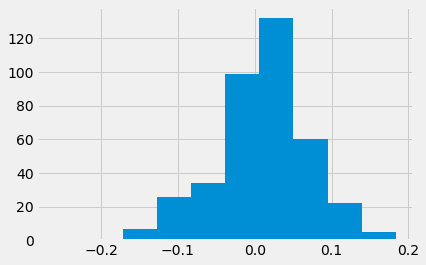

In [ ]:
mergedDf['lnReturns'].hist()

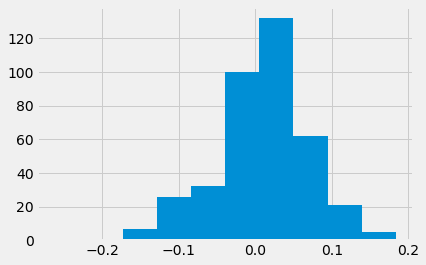

In [ ]:
mergedDf['lnReturnsRF'] = mergedDf['lnReturns']-mergedDf['RF']
mergedDf['lnReturnsRF'].hist()

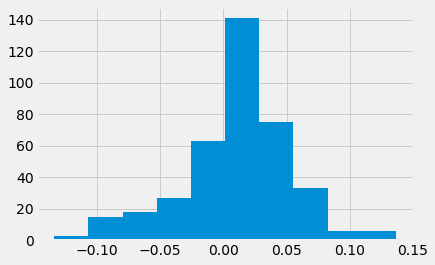

In [ ]:
mergedDf['MktRF'].hist()

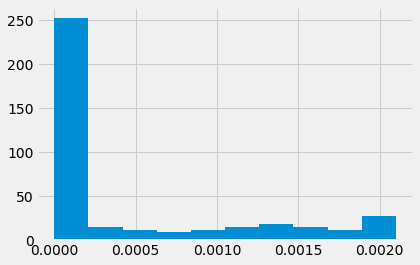

In [ ]:
mergedDf['RF'].hist()

In [ ]:
mergedDf['lnReturns']

0     -0.037778
1      0.032740
2      0.037843
3      0.044428
4      0.061179
         ...   
382   -0.114056
383   -0.131211
384   -0.059091
385   -0.150143
386   -0.118085
Name: lnReturns, Length: 387, dtype: float64

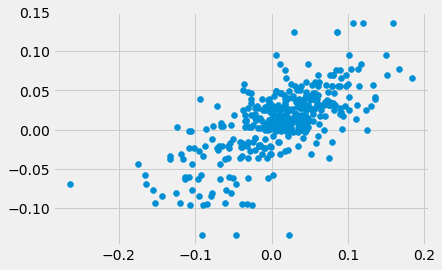

In [ ]:
 plt.scatter(mergedDf['lnReturnsRF'], mergedDf['MktRF'])

In [ ]:

analyzeEndDate = datetime(2020,1,1)
analyzeStartDate = analyzeEndDate - relativedelta(years=3)
print(analyzeStartDate.strftime("%Y%m"))
print(analyzeEndDate.strftime("%Y%m"))



201701
202001


In [ ]:

mergedDf['YearMonthNumeric'] = pd.to_numeric(mergedDf['YearMonth'])
mergedDf2_3M = mergedDf.loc[ (mergedDf['ticker'] =='MMM')]
mergedDf2_3M_2020 = mergedDf.loc[(mergedDf['YearMonthNumeric'] >=int(analyzeStartDate.strftime("%Y%m"))) & (mergedDf['YearMonthNumeric'] <int(analyzeEndDate.strftime("%Y%m")))& (mergedDf['ticker'] =='MMM')]



In [ ]:
mergedDf2_3M_2020

,YearMonth,lnReturns,ticker,Unnamed: 0,Mkt-RF,SMB,HML,RF,MktRF,lnReturnsRF,YearMonthNumeric
182,201701,-0.021224,MMM,201701,1.94,-0.0114,-0.0276,0.0004,0.0194,-0.021624,201701
185,201702,0.070361,MMM,201702,3.57,-0.0202,-0.0168,0.0004,0.0357,0.069961,201702
188,201703,0.026373,MMM,201703,0.17,0.0114,-0.0332,0.0003,0.0017,0.026073,201703
191,201704,0.023247,MMM,201704,1.09,0.0072,-0.0210,0.0005,0.0109,0.022747,201704
194,201705,0.049129,MMM,201705,1.06,-0.0252,-0.0378,0.0006,0.0106,0.048529,201705
197,201706,0.018030,MMM,201706,0.78,0.0223,0.0148,0.0006,0.0078,0.017430,201706
200,201707,-0.034301,MMM,201707,1.87,-0.0146,-0.0024,0.0007,0.0187,-0.035001,201707
203,201708,0.021273,MMM,201708,0.16,-0.0167,-0.0209,0.0009,0.0016,0.020373,201708
206,201709,0.026944,MMM,201709,2.51,0.0446,0.0312,0.0009,0.0251,0.026044,201709
209,201710,0.092274,MMM,201710,2.25,-0.0193,0.0021,0.0009,0.0225,0.091374,201710


CAPM

Y: LnReturnsRF / RtRF

X: MktRF

In [ ]:
X = pd.DataFrame(mergedDf2_3M_2020[['MktRF']])
Y = pd.DataFrame(mergedDf2_3M_2020['lnReturnsRF'])
#Y = pd.DataFrame(mergedDf2_3M_2020['RtRF'])
model = LinearRegression()
model.fit(X, Y)

print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)



Intercept: 
 [-0.0127232]
Coefficients: 
 [[1.22488081]]
